In [8]:
## import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('TSLA.csv')

In [7]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [9]:
## univariant time series we can user close proice

In [12]:
Stock=df[['Date','Close']]

In [13]:
Stock.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [14]:
Stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [15]:
Stock['Date']=pd.to_datetime(Stock['Date'])

In [16]:
Stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [17]:
Stock=Stock.set_index(Stock['Date'])

In [18]:
Stock.head()

,Date,Close
Date,,
2019-05-21,2019-05-21,41.015999
2019-05-22,2019-05-22,38.546001
2019-05-23,2019-05-23,39.098000
2019-05-24,2019-05-24,38.125999
2019-05-28,2019-05-28,37.740002


## why we convert data field as index value
- easily  retrive the data
- visualization also simple
- Time series libraries require date field value as index

In [23]:
Stock.drop(['Date'],axis=1,inplace=True)

In [24]:
Stock.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


## EDA: 
- Summary statistics
- plot the time series
- check time series components (series, cyle, seasional)
- check stationary or non- stationary
- check auto corelation (ACF, PACF)
- outlier detection
- plot ACF and PACF with arima

In [25]:
#summary status
Stock.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


Text(0.5, 1.0, 'Tesla stock vs closed date')

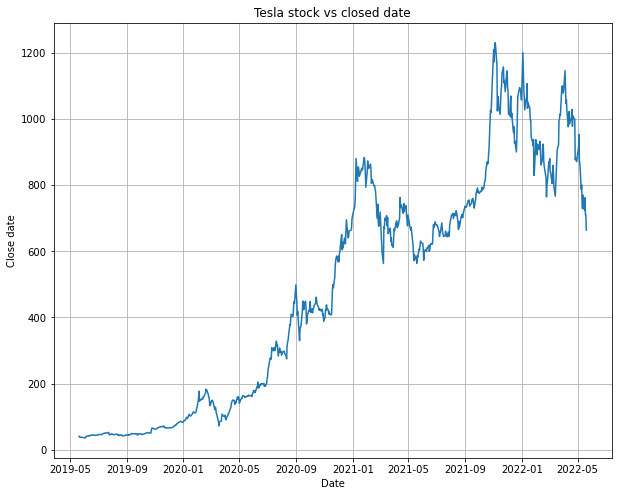

In [30]:
## visualie the time series
plt.figure(figsize=(10,8))
plt.grid(True)
plt.plot(Stock)
plt.xlabel('Date')
plt.ylabel('Close date')
plt.title('Tesla stock vs closed date')

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

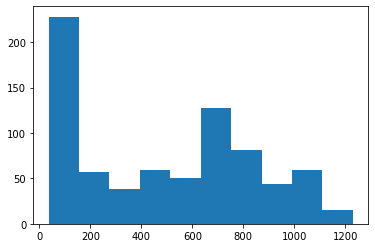

In [27]:
plt.hist(Stock)

<AxesSubplot:ylabel='Density'>

<Figure size 720x576 with 0 Axes>

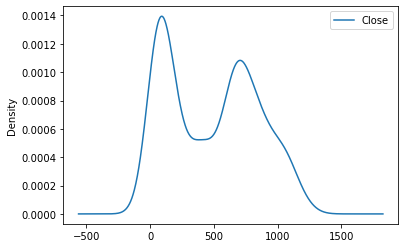

In [32]:
plt.figure(figsize=(10,8))
Stock.plot(kind='kde')

## Checking the moving average

In [34]:
rolmean=Stock['Close'].rolling(12).mean()

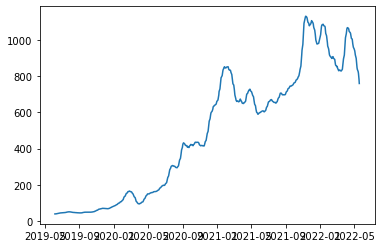

In [35]:
plt.plot(rolmean)

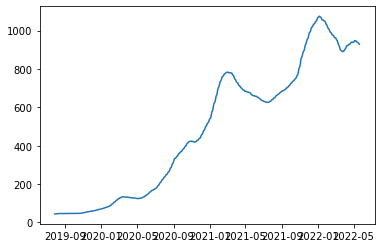

In [43]:
rolmean=Stock['Close'].rolling(48).mean()
plt.plot(rolmean)

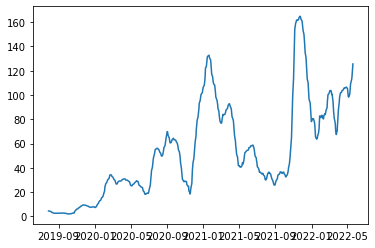

In [44]:
rolstd=Stock['Close'].rolling(48).std()
plt.plot(rolstd)

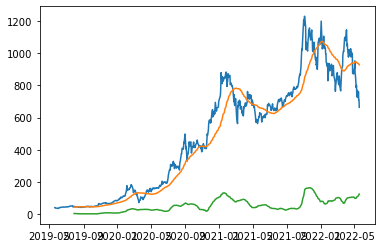

In [45]:
plt.plot(Stock['Close'])
plt.plot(rolmean)
plt.plot(rolstd)

## Ada fuller test

In [46]:
from statsmodels.tsa.stattools import adfuller

In [48]:
adf=adfuller(Stock['Close'])
adf

(-1.3630085817037487,
 0.5998762543050697,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [52]:
adfdata=pd.Series(adf[0:4],index=['test stats','p-value','lag value','total data points'])

In [54]:
adfdata['p-value']

0.5998762543050697

In [56]:
if(adfdata['p-value']<=0.05):
    print('data is stationary')
else:
    print('data is non-stationary')
    

data is non-stationary


In [57]:
## decompse the data
from statsmodels.tsa.seasonal import seasonal_decompose

In [58]:
result=seasonal_decompose(Stock['Close'],period=12)

In [59]:
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

<Figure size 1440x1080 with 0 Axes>

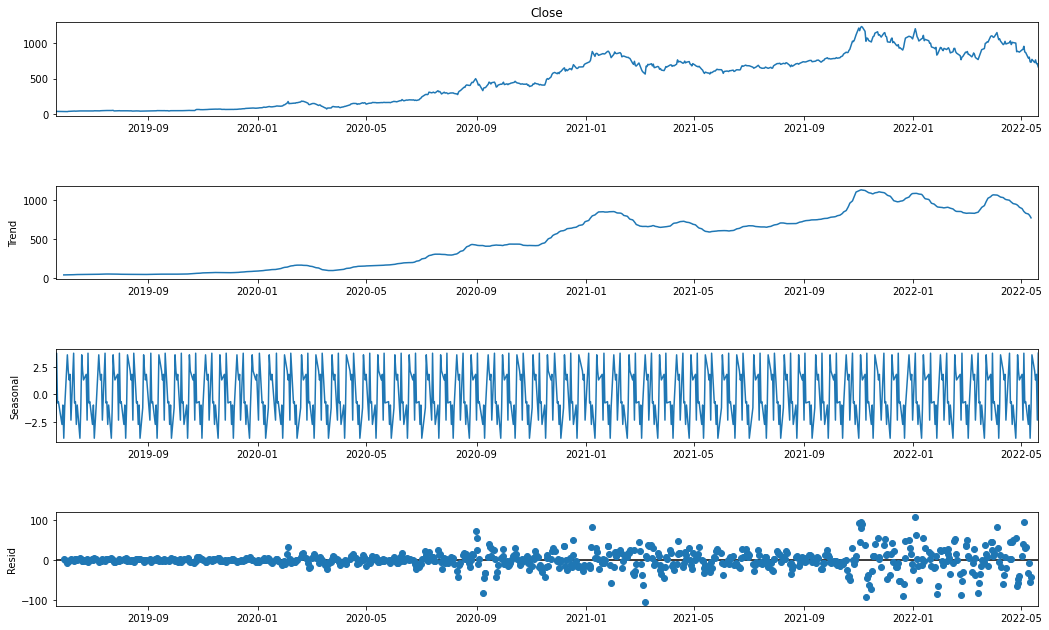

In [64]:
fig=plt.figure(figsize=(20,15))
fig=result.plot()
fig.set_size_inches(17,10)

<AxesSubplot:xlabel='Close'>

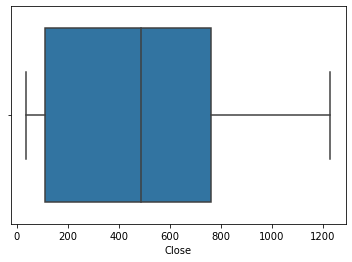

In [67]:
sns.boxplot(Stock['Close'])

## Auto corelation(ACF) and partial Auto corelation( PACF)


In [68]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

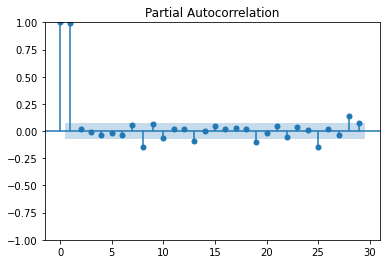

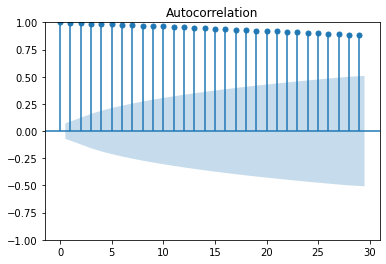

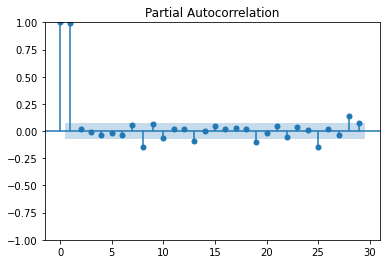

In [69]:
plot_acf(Stock['Close'])
plot_pacf(Stock['Close'])

##  Pre procesisng
- Non statinonary to stationary

In [70]:
df_close=Stock['Close']

In [84]:
df_close=df_close.diff()
df_close.dropna(inplace=True)

Text(0.5, 1.0, 'Tesla stock vs closed date')

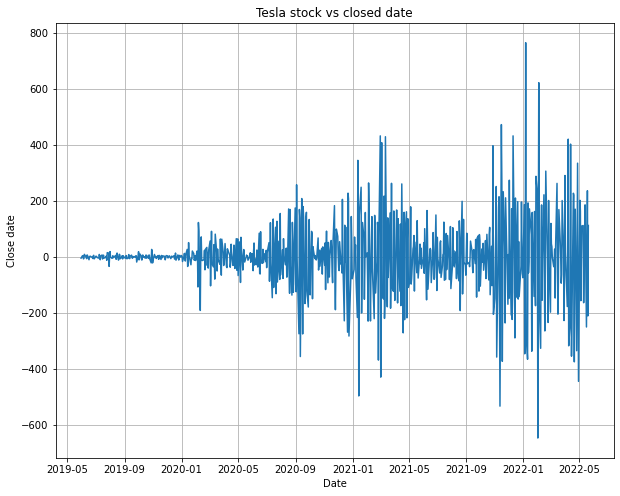

In [85]:
plt.figure(figsize=(10,8))
plt.grid(True)
plt.plot(df_close)
plt.xlabel('Date')
plt.ylabel('Close date')
plt.title('Tesla stock vs closed date')

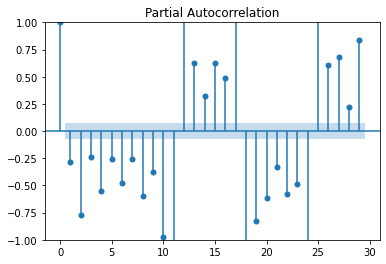

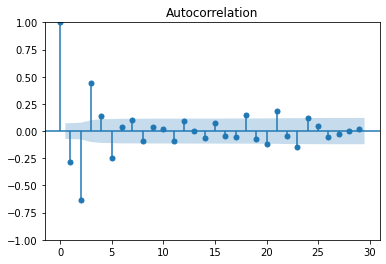

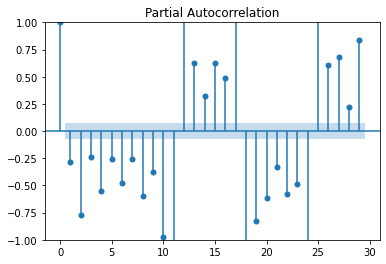

In [86]:
plot_acf(df_close)
plot_pacf(df_close)

In [81]:
from sklearn.model_selection  import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [105]:
df_train=df_close[0:-60]

In [90]:
df_train

Date
2019-05-31     -4.333984
2019-06-03      4.123985
2019-06-04      4.270008
2019-06-05     -6.985996
2019-06-06     -5.702019
                 ...    
2022-02-17     76.859985
2022-02-18    306.319946
2022-02-22    -68.569824
2022-02-23   -233.920288
2022-02-24    201.470093
Name: Close, Length: 691, dtype: float64

In [106]:
df_test=df_close[-60:]

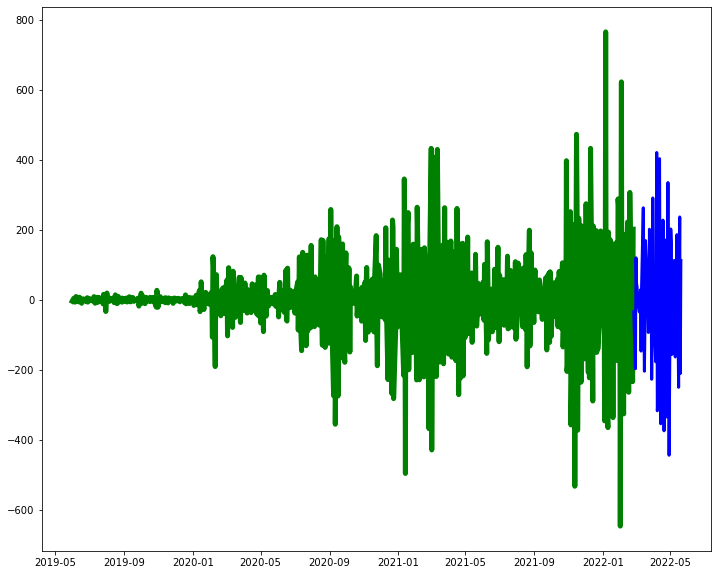

In [107]:
plt.figure(figsize=(12,10))
plt.plot(df_train,color='green',linewidth=5,label="train data")
plt.plot(df_test,color='blue',linewidth=3,label="test data")
plt.show()

## MODEL BUILDING

In [175]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [176]:
history= [x for x in df_train]

In [182]:
model=ARIMA(history,order=(2,1,0))

In [183]:
model

In [184]:
model=model.fit()

In [185]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  691
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -4230.267
Date:                Wed, 10 May 2023   AIC                           8466.534
Time:                        09:40:13   BIC                           8480.144
Sample:                             0   HQIC                          8471.798
                                - 691                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6644      0.016    -42.213      0.000      -0.695      -0.634
ar.L2         -0.7934      0.014    -58.557      0.000      -0.820      -0.767
sigma2      1.238e+04    348.309     35.534      0.000    1.17e+04    1.31e+04
===================================================================================
Ljung-Box (L1) (Q):                  45.35   Jarque-Bera (JB):               957.70
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              34.75   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [190]:
model.forecast(alpha=0.05) ## next values is given

array([43.38968141])

In [191]:
df_test[0]

-34.25976562499966

In [192]:
mean_squared_error([df_test[0]],model.forecast() )

6029.436624159829

In [193]:
np.sqrt(mean_squared_error([df_test[0]],model.forecast() ))

77.64944703061207

In [126]:
pvalue=range(0,3)
qvalue=range(0,3)
rvalue=range(0,3)

In [129]:
for i in pvalue:
    for j in qvalue:
        for k in rvalue:
            print(i,j,k)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [130]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [ ]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(df_test, df_test, p_values, d_values, q_values)

In [172]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [173]:
history= [x for x in df_train]
predictions = list()
conf_list = list()
for t in range(len(df_test)):
    model=ARIMA(history,order=(2,0,0))
    model_fit=model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append([t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(df_test, predictions)))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [194]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
history = [x for x in df_train]
predictions = list()
conf_list = list()
for t in range(len(df_test)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(df_test[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(df_test, predictions)))

RMSE of SARIMA Model: 283.19091042233487


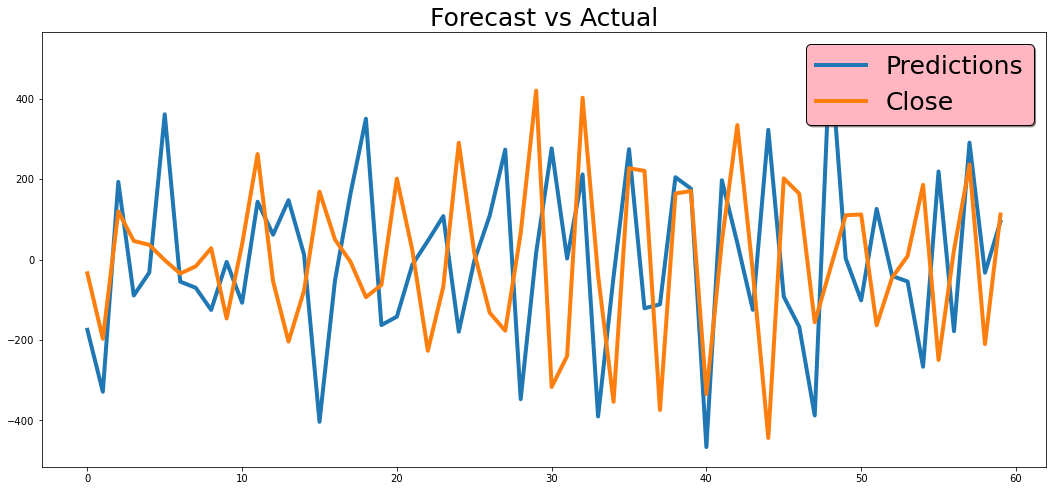

In [195]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), df_test, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')